<a href="https://colab.research.google.com/github/shubhamnakum/Codsoft_intern/blob/main/Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**SALES PREDICTION USING PYTHON**

---



# Importing Dependecies

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Loading Dataset & Analyzing it

In [30]:
dataset = pd.read_csv('advertising.csv')
dataset.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [31]:
dataset.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

This dataset does not contain any Null Values.

In [32]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Spilitting the Dataset into Training & Test sets

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

# Training the Dataset using Polynomial Regression

In [34]:
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

LinearRegression()

# Predicting the Testset

In [35]:
# Transform the test set using the same PolynomialFeatures object
X_poly_test = poly_reg.transform(X_test)

# Predict the y values for the test set
y_pred = lin_reg_2.predict(X_poly_test)

np.set_printoptions(precision=2)
print(y_test)
print()
print(y_pred)

[11.3  8.4 12.  25.4 16.7  8.7  7.2 18.2  9.2 16.6 24.2 10.6 15.5 20.6
 11.8 13.2 17.4  1.6 14.7 17.  26.2 10.3 16.1 12.9  8.1 15.2 17.6 22.6
 16.6  8.5 12.5 23.7 16.1 21.8  5.6  6.7  9.7 17.9 13.6  7.2 10.8 11.
 15.  20.9 17.1 14.   4.8  8.7 15.9 10.4 12.4 19.7 17.6 20.5 10.1  9.7
 21.4 16.4 16.6  5.5 17.7 16.7 17.2 14.6 16.  19.4 20.2]

[10.48  8.75 10.96 24.94 15.14  8.99  9.39 17.85  8.72 17.91 23.99 11.09
 14.4  17.23 11.47 13.59 20.18  7.   14.49 18.78 25.17 13.62 16.72 14.07
  8.81 15.44 15.14 21.88 16.91  7.76 13.07 22.62 19.56 22.16  6.36  6.58
  9.4  15.86 13.14  7.   10.15  8.16 15.91 18.12 18.71 13.54  5.92  9.59
 16.28 11.83 12.54 20.79 19.78 17.02  9.17  9.59 22.13 16.11 17.94  6.54
 17.99 16.14 16.86 15.48 19.06 20.37 21.32]


# Plotting the values of Actual vs Predicted data

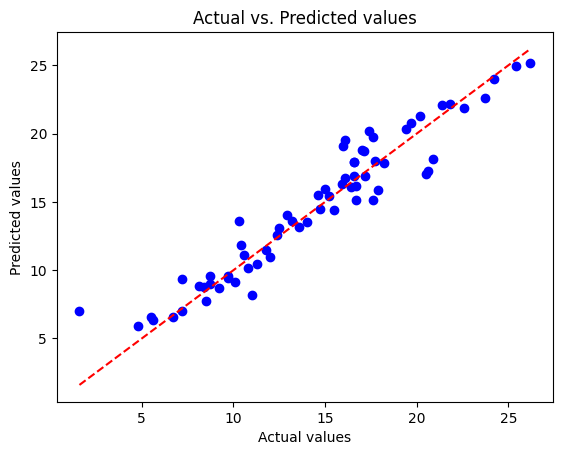

In [36]:
# Plotting the actual vs. predicted values
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs. Predicted values')
plt.show()

# Model Evaluation

In [37]:
# Assuming 'regressor' is your LinearRegression model
y_pred = lin_reg_2.predict(X_poly_test)
accuracy = r2_score(y_test, y_pred)
print("Accuracy:", accuracy)
accuracy_percentage = accuracy * 100
print("Accuracy:", accuracy_percentage)


Accuracy: 0.9133212912814365
Accuracy: 91.33212912814365
